# Homework 2

*DASCI 270 - Time Series Analysis*

*Prepared by Sebastian C. Ibañez, PhD*

`Life can only be understood backwards; but it must be lived forwards.
-Søren Kierkegaard`

In [49]:
%%capture
!pip install statsforecast
!pip install mlforecast
!pip install utilsforecast
!pip install tsfeatures
!pip install squarify

!wget 'https://github.com/scibanez/crops-time-series-dataset/raw/refs/heads/main/crops.csv' -P ./data/

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# You can modify this to improve aesthetics
plt.style.use("ggplot")
plt.rcParams.update({
    "figure.figsize": (10, 4),
    "figure.dpi": 150,
    "savefig.dpi": 300,
    "figure.constrained_layout.use": True,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "legend.title_fontsize": 10,
})

pd.set_option("display.precision", 4)
np.set_printoptions(suppress=True)

## Forecasting Philippine Crop Production

**Dataset**: `crops.csv`

Here, we will load the `crops.csv` dataset and aggregate the data to create a time series for each crop, with quarterly frequency from 2010 to 2020. The rows represent the quarterly time steps and the columns represent the crops.

*Note that the transposed dataframe is displayed for ease of inspection.*

In [51]:
# Basic set-up
df = pd.read_csv("./data/crops.csv")
df = df.drop(['id', 'Commodity', 'Province', 'Region'], axis=1).groupby('Crop').sum()
df.index.names = ['unique_id']
df = df.T
df.index = pd.PeriodIndex(df.index, freq='Q').to_timestamp()
df.index.names = ['ds']
df.T

ds,2010-01-01,2010-04-01,2010-07-01,2010-10-01,2011-01-01,2011-04-01,2011-07-01,2011-10-01,2012-01-01,2012-04-01,...,2020-07-01,2020-10-01,2021-01-01,2021-04-01,2021-07-01,2021-10-01,2022-01-01,2022-04-01,2022-07-01,2022-10-01
unique_id,,,,,,,,,,,,,,,,,,,,,
Abaca,1.6644e+04,19064.76,1.6168e+04,1.4582e+04,1.6595e+04,1.9554e+04,1.7445e+04,14949.41,1.7032e+04,2.0067e+04,...,2.0088e+04,1.7619e+04,1.2771e+04,1.8204e+04,1.5855e+04,1.5575e+04,1.4560e+04,1.7968e+04,1.9267e+04,1.6028e+04
Abaca Leafsheath,5.4100e+00,29.61,3.0280e+01,2.3150e+01,5.2000e+00,2.6170e+01,3.0610e+01,17.75,4.6900e+00,2.5080e+01,...,2.2910e+01,3.5690e+01,1.7540e+01,1.0470e+01,2.3300e+01,3.4340e+01,1.5010e+01,9.5600e+00,2.2580e+01,3.4290e+01
Abiu,0.0000e+00,0.80,0.0000e+00,1.4500e+00,0.0000e+00,1.0000e-01,0.0000e+00,0.00,0.0000e+00,1.2000e-01,...,0.0000e+00,1.4000e-01,1.9000e-01,2.0000e-02,8.5000e-01,1.5000e-01,2.0000e-01,6.0000e-02,4.3000e-01,1.8000e-01
Achuete,7.3150e+01,70.26,6.1060e+01,6.0320e+01,6.8780e+01,6.3870e+01,5.9530e+01,56.14,6.8020e+01,5.8480e+01,...,5.0790e+01,1.7890e+02,4.6010e+01,3.2790e+01,4.9830e+01,6.1500e+01,4.6190e+01,3.4830e+01,4.8650e+01,6.0600e+01
African Palm Leaves,2.1053e+02,218.88,2.4230e+02,2.3443e+02,2.1212e+02,2.3402e+02,2.4951e+02,249.38,2.2228e+02,2.4565e+02,...,2.4914e+02,2.2240e+02,1.4638e+02,2.4430e+02,2.4074e+02,2.2542e+02,1.5711e+02,2.6805e+02,2.5506e+02,2.2066e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellow Bell,7.1100e+00,12.21,1.0750e+01,1.1790e+01,7.3000e+00,1.2150e+01,1.1270e+01,11.86,7.6000e+00,1.2790e+01,...,1.2030e+01,1.1320e+01,6.9900e+00,1.0360e+01,1.3540e+01,1.1190e+01,6.2400e+00,1.0180e+01,1.2470e+01,1.0450e+01
Yellow Corn,1.1483e+06,516050.00,1.4700e+06,1.0732e+06,1.3827e+06,1.0497e+06,1.4970e+06,891487.00,1.5312e+06,1.0489e+06,...,1.9001e+06,1.1620e+06,1.9649e+06,1.1199e+06,1.3988e+06,1.5612e+06,1.9632e+06,1.1717e+06,1.5143e+06,1.4396e+06
Yerba Buena,3.9200e+00,4.22,2.7800e+00,2.6000e+00,3.8700e+00,4.6000e+00,2.8700e+00,2.62,3.9400e+00,3.5400e+00,...,3.2000e+00,3.2800e+00,3.7400e+00,3.8600e+00,3.4600e+00,3.8200e+00,3.3300e+00,3.8500e+00,3.0500e+00,3.3700e+00


### E1. Exploratory Data Analysis

#### Q1.

- Create a basic pipeline for visualizing and exploring the dataset.

- Select at least four different crops that you find *interesting*.

- Plot the production volume over time for each of your selected crops.

- For each plot, briefly describe the time series components, key patterns, and distinct characteristics that you observe.

CROP ANALYSIS PIPELINE

1. Preparing data...

2. Extracting features...
Extracting time series features...
Feature extraction completed in 1.84 seconds

3. Creating overview visualizations...


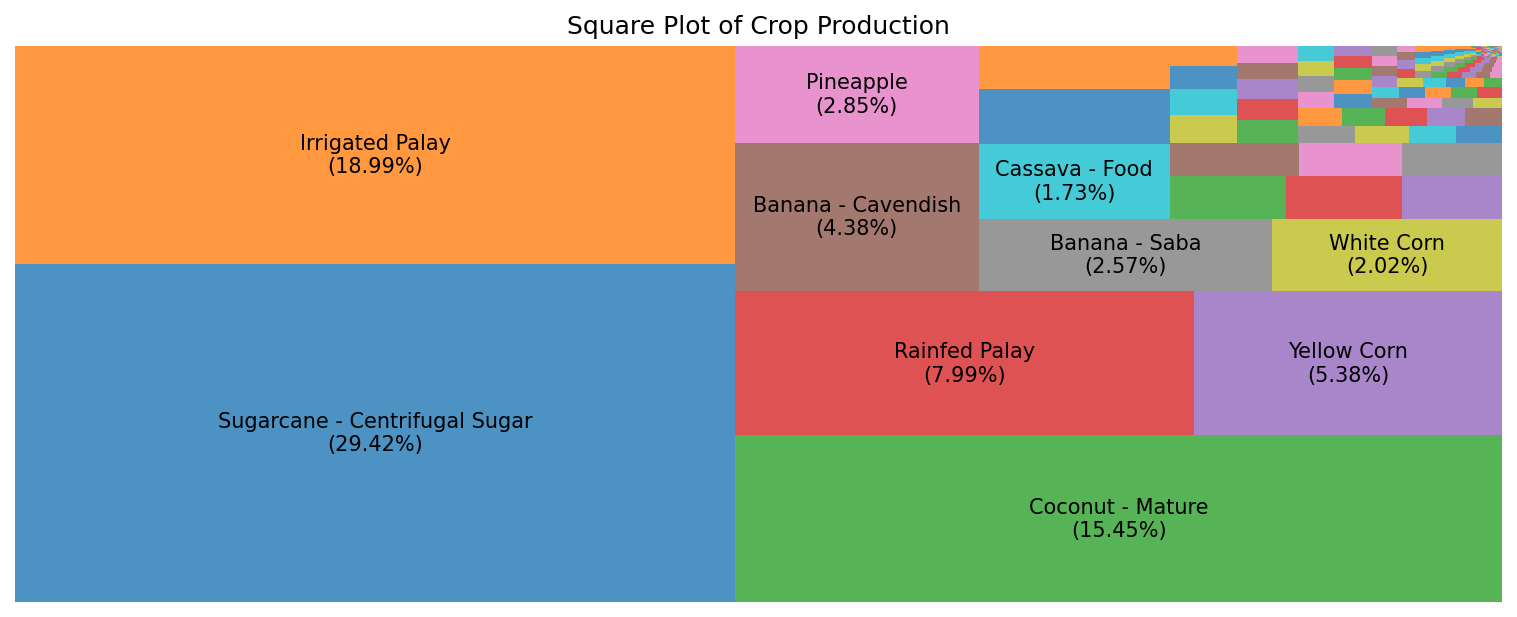


4. Analyzing feature distributions...


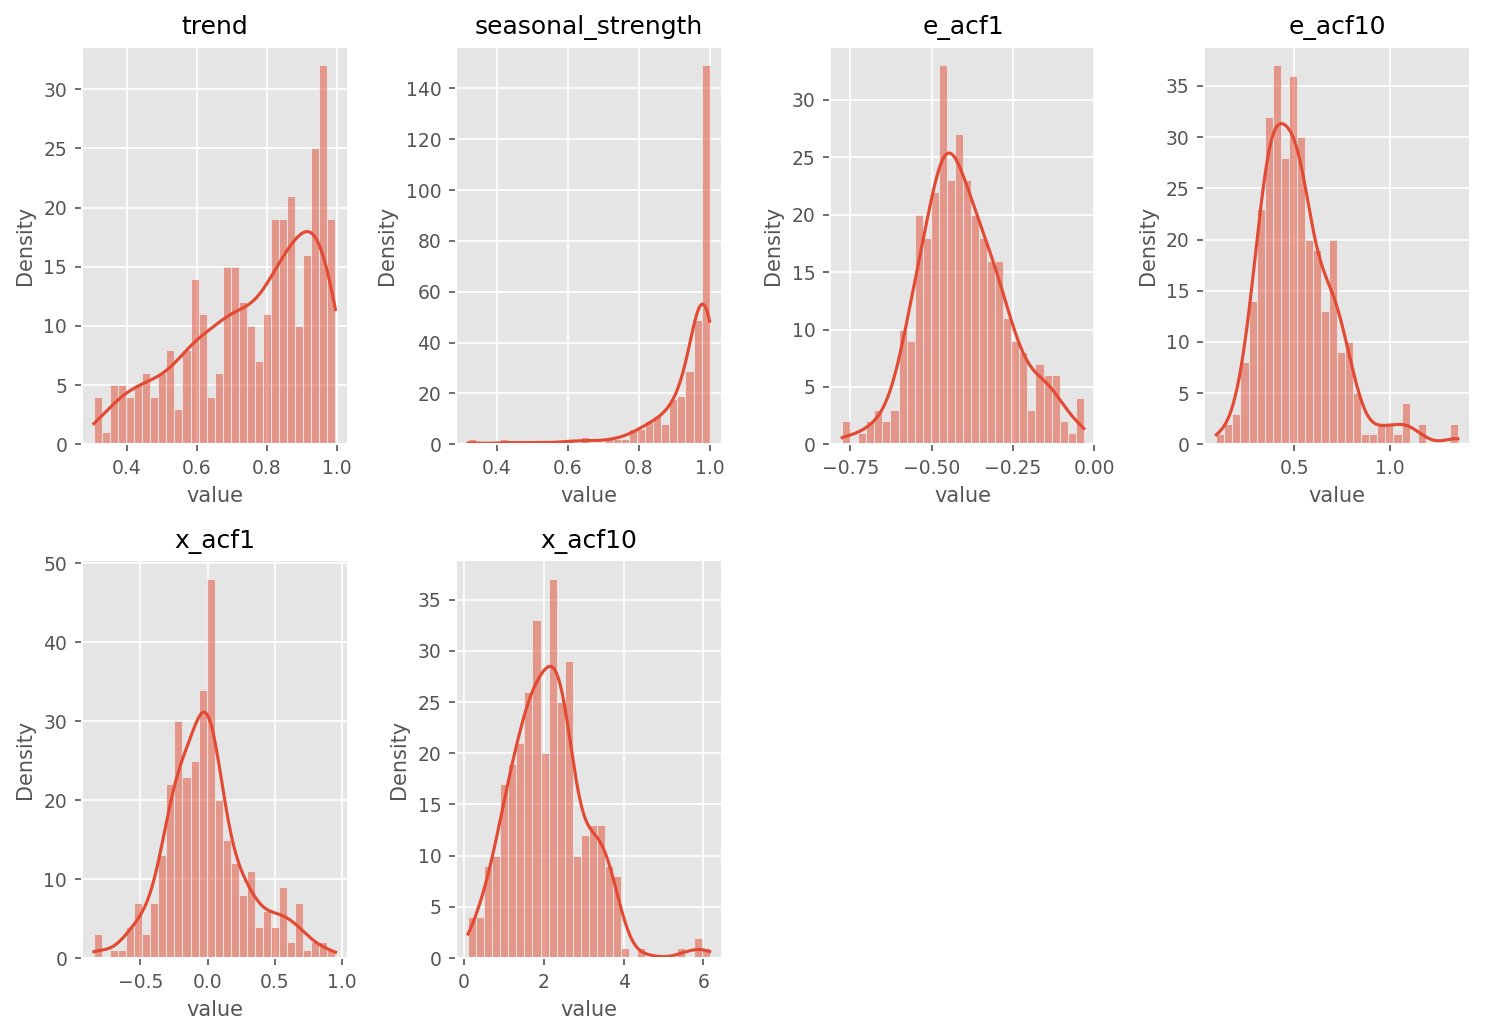


5. Creating seasonal plots...


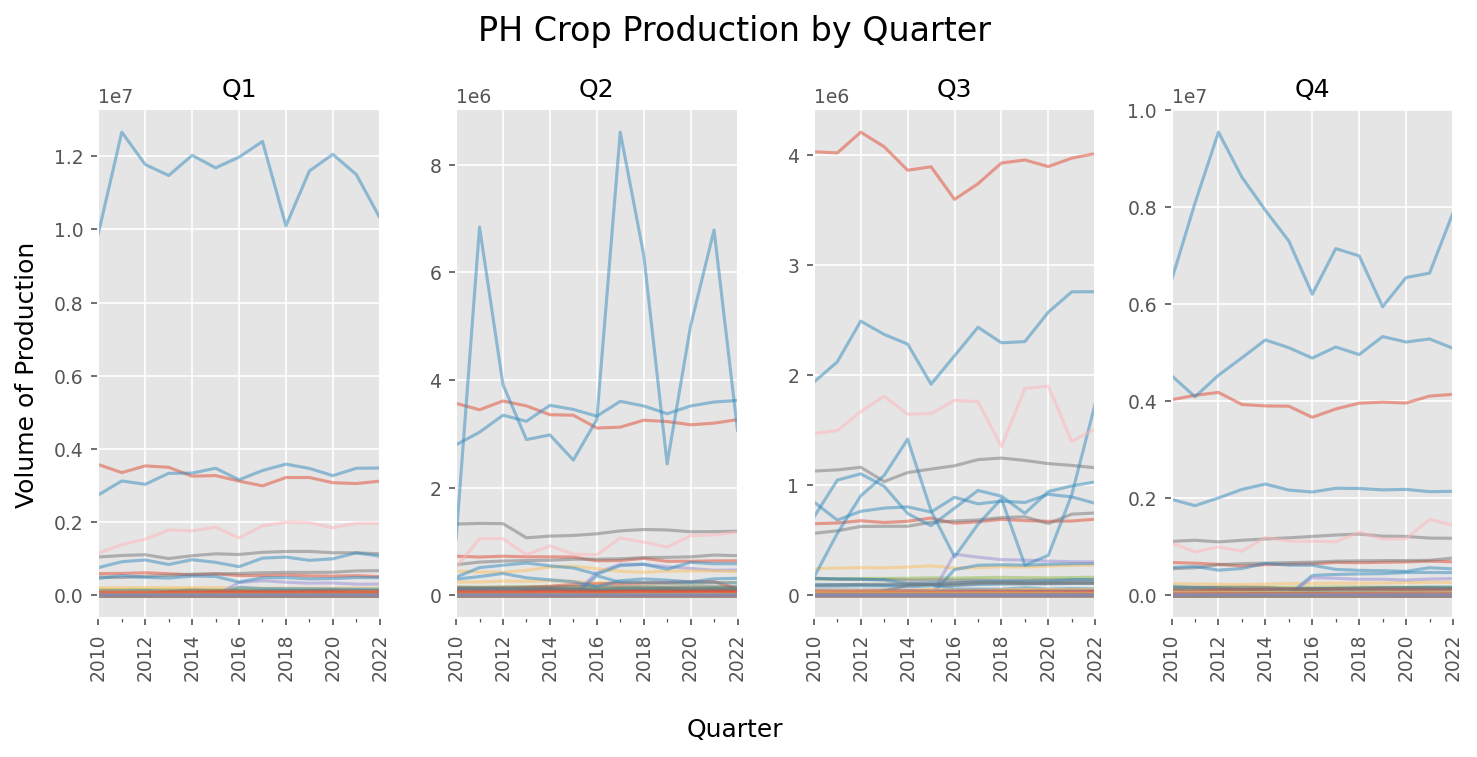


6. Creating STL decompositions...
   - Decomposing Irrigated Palay


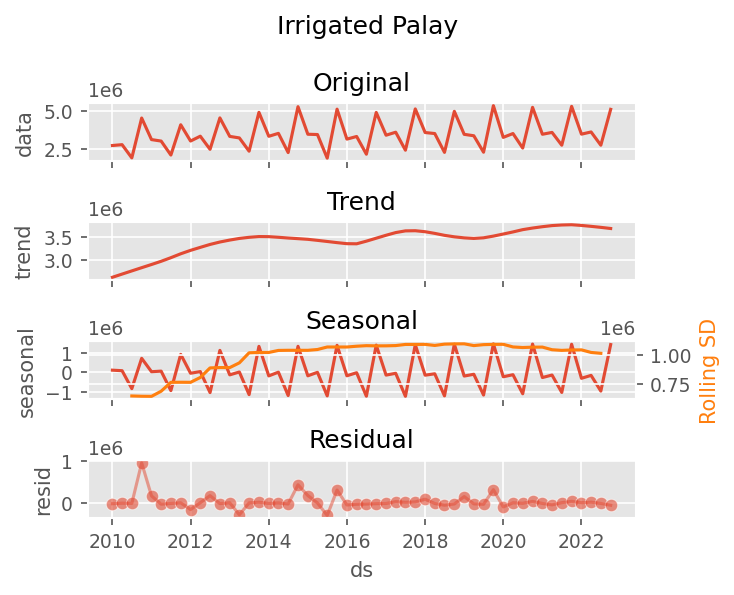

   - Decomposing Banana - Cavendish


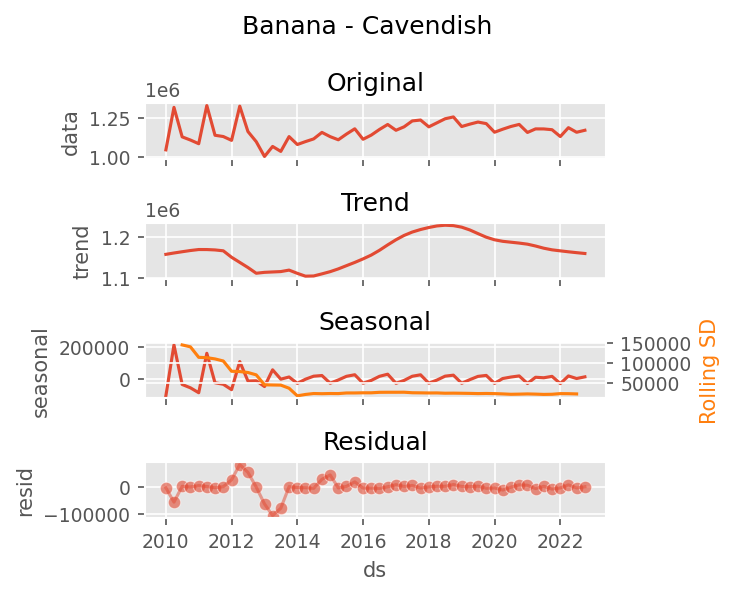

   - Decomposing Coconut - Mature


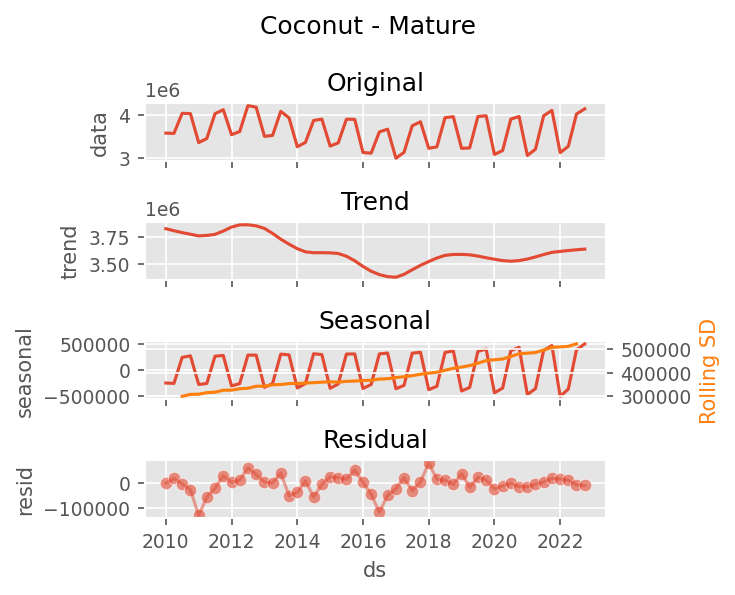

   - Decomposing Sugarcane - Centrifugal Sugar


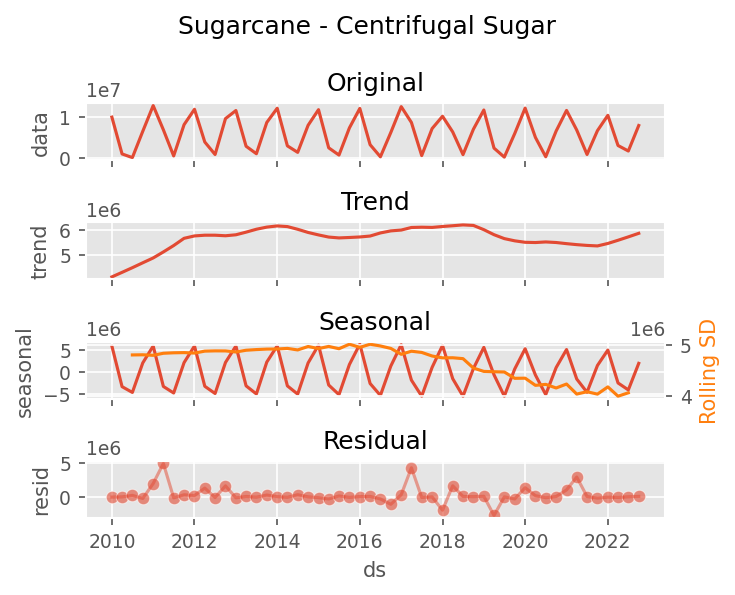


ANALYSIS COMPLETE


,unique_id,nperiods,seasonal_period,trend,spike,linearity,curvature,e_acf1,e_acf10,seasonal_strength,...,variance,median,p2point5,p5,p25,p75,p95,p97point5,max,min
0,Abaca,1,4,0.6298,1.0006e+08,687.6987,-2524.8742,-0.4088,0.3441,0.9006,...,3.3643e+06,17272.850,13396.6195,14308.6340,15830.6000,18855.7200,19820.3055,20062.2873,20087.96,12770.63
1,Abaca Leafsheath,1,4,0.7391,3.7745e-02,7.1850,-7.8396,-0.1257,0.8842,0.9558,...,1.1017e+02,23.030,4.9383,5.0920,15.8425,30.3625,38.8240,40.0285,51.57,4.69
2,Abiu,1,4,0.5333,9.2722e-07,-0.3575,0.7243,-0.5886,0.5932,0.6606,...,8.8323e-02,0.050,0.0000,0.0000,0.0000,0.1225,0.8090,0.8417,1.45,0.00
3,Achuete,1,4,0.4692,1.0299e+02,-4.0463,-88.8636,-0.4195,0.3695,0.8391,...,2.2301e+03,55.020,35.1572,37.8955,49.1825,64.8675,189.4740,194.0580,201.32,32.79
4,African Palm Leaves,1,4,0.7032,3.1332e+00,-51.6970,20.7677,-0.1358,0.6273,0.8992,...,7.4825e+02,223.405,149.7000,155.1980,213.8900,240.0525,252.0075,260.8310,268.05,146.38


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from tsfeatures import *
from statsmodels.tsa.seasonal import STL
import time
from typing import List, Dict, Any

# Configuration
CONFIG = {
    'figure_size': (10, 4),
    'stl_figure_size': (5, 4),
    'seasonal_figure_size': (10, 5),
    'hist_figure_size': (10, 7),
    'stl_period': 4,
    'rolling_window': 4,
    'top_n_crops': 10,
    'selected_features': ['trend', 'seasonal_strength', 'e_acf1', 'e_acf10', 'x_acf1', 'x_acf10'],
    'selected_crops': ['Irrigated Palay', 'Banana - Cavendish', 'Coconut - Mature', 'Sugarcane - Centrifugal Sugar']
}

class CropAnalysisPipeline:
    """
    A comprehensive pipeline for crop production time series analysis and forecasting.
    """

    def __init__(self, config: Dict[str, Any] = CONFIG):
        self.config = config
        self.crops_data = None
        self.features_data = None

    def load_and_prepare_data(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Convert wide format crop data to long format for analysis.

        Parameters:
        -----------
        df : pd.DataFrame
            Wide format DataFrame with crops as columns and dates as index

        Returns:
        --------
        pd.DataFrame
            Long format DataFrame with columns: ds, unique_id, y
        """
        try:
            self.crops_data = df.reset_index().melt(
                id_vars='ds',
                var_name='unique_id',
                value_name='y'
            )
            return self.crops_data
        except Exception as e:
            print(f"Error in data preparation: {e}")
            return None

    def create_treemap(self, df_slice: pd.DataFrame, title: str = "Tree Map of Crop Production") -> None:
        """Create interactive treemap visualization of crop production."""
        try:
            entry = (df_slice + 1E-16).copy()
            entry.columns = ['vol']
            entry['id'] = np.arange(len(entry))

            fig = px.treemap(
                entry,
                path=[px.Constant('crop'), entry.index],
                values='vol',
                color='id',
                title=title
            )
            fig.update_traces(textinfo="label+value+percent entry")
            fig.show()
        except Exception as e:
            print(f"Error creating treemap: {e}")

    def create_squareplot(self, df_slice: pd.DataFrame, title: str = "Square Plot of Crop Production") -> None:
        """Create square plot visualization showing top N crops by production."""
        try:
            entry = (df_slice + 1E-16).copy()
            entry.columns = ['vol']
            entry.sort_values(by='vol', ascending=False, inplace=True)
            entry['volz'] = entry['vol'] / entry['vol'].sum() * 100

            top_n = self.config['top_n_crops']
            labels = [
                f"{crop}\n({pct:.2f}%)" if i < top_n else ""
                for i, (crop, pct) in enumerate(zip(entry.index, entry['volz']))
            ]

            plt.figure(figsize=self.config['figure_size'])
            squarify.plot(
                sizes=entry['vol'],
                label=labels,
                color=sns.color_palette("tab10", len(entry)),
                alpha=0.8
            )
            plt.axis('off')
            plt.title(title)
            plt.show()
        except Exception as e:
            print(f"Error creating squareplot: {e}")

    def extract_features(self, freq: int = 4) -> pd.DataFrame:
        """
        Extract comprehensive time series features from crop data.

        Parameters:
        -----------
        freq : int
            Frequency of the time series (4 for quarterly)

        Returns:
        --------
        pd.DataFrame
            DataFrame with extracted features
        """
        if self.crops_data is None:
            print("Error: No crops data loaded. Call load_and_prepare_data first.")
            return None

        try:
            start_time = time.time()
            print("Extracting time series features...")

            all_features = [statistics, acf_features, stl_features]
            self.features_data = tsfeatures(
                self.crops_data,
                freq=freq,
                features=all_features,
                scale=False
            )

            print(f"Feature extraction completed in {time.time() - start_time:.2f} seconds")
            return self.features_data
        except Exception as e:
            print(f"Error extracting features: {e}")
            return None

    def plot_feature_distributions(self, features: List[str] = None) -> None:
        """Plot histograms for selected features."""
        if self.features_data is None:
            print("Error: No features data available. Call extract_features first.")
            return

        features = features or self.config['selected_features']

        try:
            # Reshape data for plotting
            long_data = (self.features_data
                        .drop(columns=['nperiods', 'seasonal_period'], errors='ignore')
                        .melt(id_vars='unique_id', var_name='feature', value_name='value'))

            # Create subplots
            n_features = len(features)
            n_cols = 4
            n_rows = (n_features - 1) // n_cols + 1

            fig, axes = plt.subplots(n_rows, n_cols, figsize=self.config['hist_figure_size'])
            axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

            for i, feature in enumerate(features):
                if i < len(axes):
                    feature_data = long_data[long_data['feature'] == feature]['value']
                    sns.histplot(feature_data, kde=True, bins=30, ax=axes[i])
                    axes[i].set_title(feature)
                    axes[i].set_ylabel("Density")

            # Hide unused subplots
            for i in range(len(features), len(axes)):
                axes[i].set_visible(False)

            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error plotting feature distributions: {e}")

    def create_seasonal_plot(self, title: str = "PH Crop Production by Quarter",
                           ylabel: str = "Volume of Production") -> None:
        """Create seasonal plots by quarter for all crops."""
        if self.crops_data is None:
            print("Error: No crops data loaded.")
            return

        try:
            crops = self.crops_data.copy()
            crops['Quarter'] = crops['ds'].dt.quarter
            crops['year'] = crops['ds'].dt.year

            fig, axes = plt.subplots(1, 4, sharex=True, figsize=self.config['seasonal_figure_size'])
            quarters = sorted(crops["Quarter"].unique())

            for j, quarter in enumerate(quarters):
                quarter_data = crops[crops["Quarter"] == quarter]
                pivot_data = quarter_data.pivot_table(
                    index='ds', columns='unique_id', values='y'
                )
                pivot_data.plot(ax=axes[j], legend=False, alpha=0.5)
                axes[j].set_title(f'Q{quarter}')
                axes[j].set_xlabel("")
                axes[j].tick_params(axis="x", rotation=90)

            fig.supylabel(ylabel, va="center", rotation=90)
            fig.supxlabel("Quarter", ha="center")
            fig.suptitle(title, fontsize=16)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error creating seasonal plot: {e}")

    def create_stl_decomposition(self, crop_name: str) -> None:
        """
        Create STL decomposition plot for a specific crop.

        Parameters:
        -----------
        crop_name : str
            Name of the crop to decompose
        """
        if self.crops_data is None:
            print("Error: No crops data loaded.")
            return

        try:
            crop_data = self.crops_data[self.crops_data['unique_id'] == crop_name].copy()
            if crop_data.empty:
                print(f"No data found for crop: {crop_name}")
                return

            # STL decomposition
            stl_result = STL(crop_data['y'], period=self.config['stl_period'], robust=True).fit()

            # Prepare decomposition data
            decomp_data = pd.DataFrame({
                'ds': crop_data["ds"].values,
                'data': crop_data["y"].values,
                'trend': stl_result.trend,
                'seasonal': stl_result.seasonal,
                'resid': stl_result.resid
            })

            # Create plots
            fig, axes = plt.subplots(4, 1, sharex=True, figsize=self.config['stl_figure_size'])

            # Plot components
            sns.lineplot(data=decomp_data, x='ds', y='data', ax=axes[0])
            axes[0].set_title('Original')

            sns.lineplot(data=decomp_data, x='ds', y='trend', ax=axes[1])
            axes[1].set_title('Trend')

            sns.lineplot(data=decomp_data, x='ds', y='seasonal', ax=axes[2])
            axes[2].set_title('Seasonal')

            sns.scatterplot(data=decomp_data, x='ds', y='resid', ax=axes[3], alpha=0.6)
            sns.lineplot(data=decomp_data, x='ds', y='resid', ax=axes[3], alpha=0.5)
            axes[3].set_title('Residual')

            # Add rolling variance to seasonal plot
            decomp_data['seasonal_sd'] = decomp_data['seasonal'].rolling(
                window=self.config['rolling_window'], center=True
            ).std()

            ax2 = axes[2].twinx()
            sns.lineplot(data=decomp_data, x='ds', y='seasonal_sd', color='tab:orange', ax=ax2)
            ax2.set_ylabel('Rolling SD', color='tab:orange')

            fig.suptitle(crop_name, fontsize=12)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error creating STL decomposition for {crop_name}: {e}")

    def run_analysis_pipeline(self, df: pd.DataFrame, create_visualizations: bool = True) -> None:
        """
        Run the complete analysis pipeline.

        Parameters:
        -----------
        df : pd.DataFrame
            Input crop production data
        create_visualizations : bool
            Whether to create all visualizations
        """
        print("=" * 50)
        print("CROP ANALYSIS PIPELINE")
        print("=" * 50)

        # Step 1: Data preparation
        print("\n1. Preparing data...")
        self.load_and_prepare_data(df)

        # Step 2: Feature extraction
        print("\n2. Extracting features...")
        self.extract_features()

        if create_visualizations:
            # Step 3: Basic visualizations
            print("\n3. Creating overview visualizations...")
            latest_data = df.iloc[-1].to_frame()
            self.create_squareplot(latest_data)

            # Step 4: Feature analysis
            print("\n4. Analyzing feature distributions...")
            self.plot_feature_distributions()

            # Step 5: Seasonal analysis
            print("\n5. Creating seasonal plots...")
            self.create_seasonal_plot()

            # Step 6: STL decomposition for selected crops
            print("\n6. Creating STL decompositions...")
            for crop in self.config['selected_crops']:
                print(f"   - Decomposing {crop}")
                self.create_stl_decomposition(crop)

        print("\n" + "=" * 50)
        print("ANALYSIS COMPLETE")
        print("=" * 50)

# Usage example:
# Initialize pipeline
pipeline = CropAnalysisPipeline()

# Run complete analysis
pipeline.run_analysis_pipeline(df, create_visualizations=True)

# Access extracted features
if pipeline.features_data is not None:
    display(pipeline.features_data.head())

#### Q1 - Answer:

* I plotted a map showing the volume share of different crops to the total PH Crop production.
* For Q42022, the top five produced crops (in volume) are: Irrigated Palay, Coconut-Mature, Sugarcane - Centrifugal Sugar, Banana - Canvedish, and Yellow Corn.
* Most crop specie production exhibit strong seasonality (seasonal strength > 0.8).

* I chose the top five produced crops.
* a. Irrigated Palay show strong seasonality with peak of volume production in Q4.
* b. Banana - Cavendish initially exhibited strong seasonality (max amplitude = 10,000) in 2010-2012 with peak production in Q2. Starting 2014, the amplitude of seasonality significantly decreased and now dominated with a slow moving cycle.
* c. Coconut-Mature shows seasonality with peak production in Q3-Q4. There was a decreasing trend in Coconut production in 2012-2016. From 2018 onwards, there was a trend reversal towards increase in production.
* d. Sugarcane production is strongly seasonal with peak production in Q1. There is a flat trend in production since 2012.


#### Q2.

- Did COVID-19 have an effect on crop production in the Philippines?

- Did the onset of the COVID-19 pandemic in 2020 have a noticeable effect on crop production?

- Create a visualization to support your answer. You could, for example, plot the aggregate production of all crops over time and highlight the 2020 period.

- Briefly state your conclusion based on the plot.

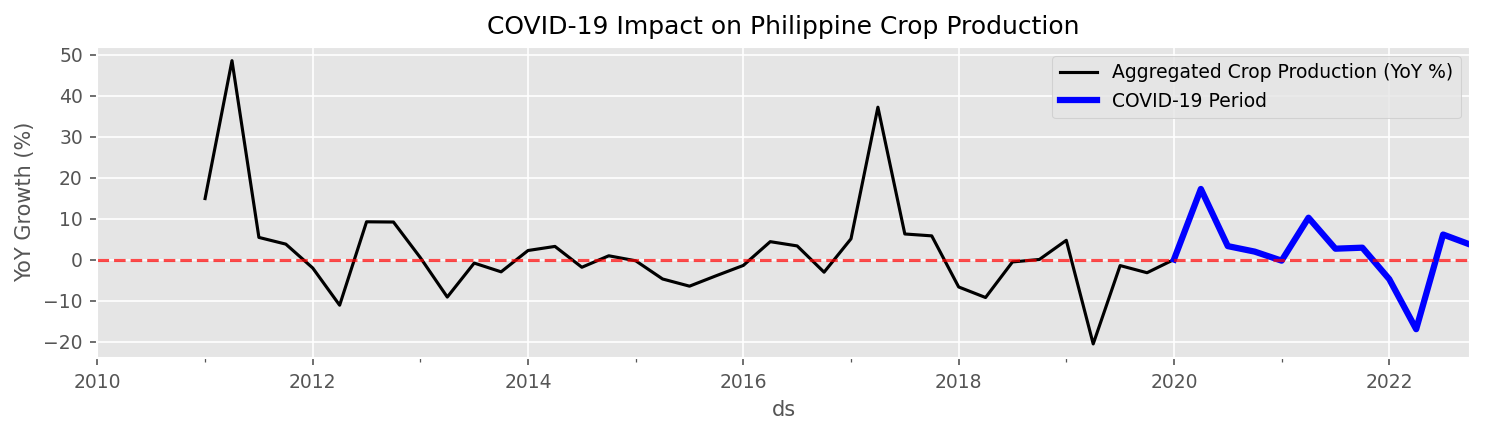

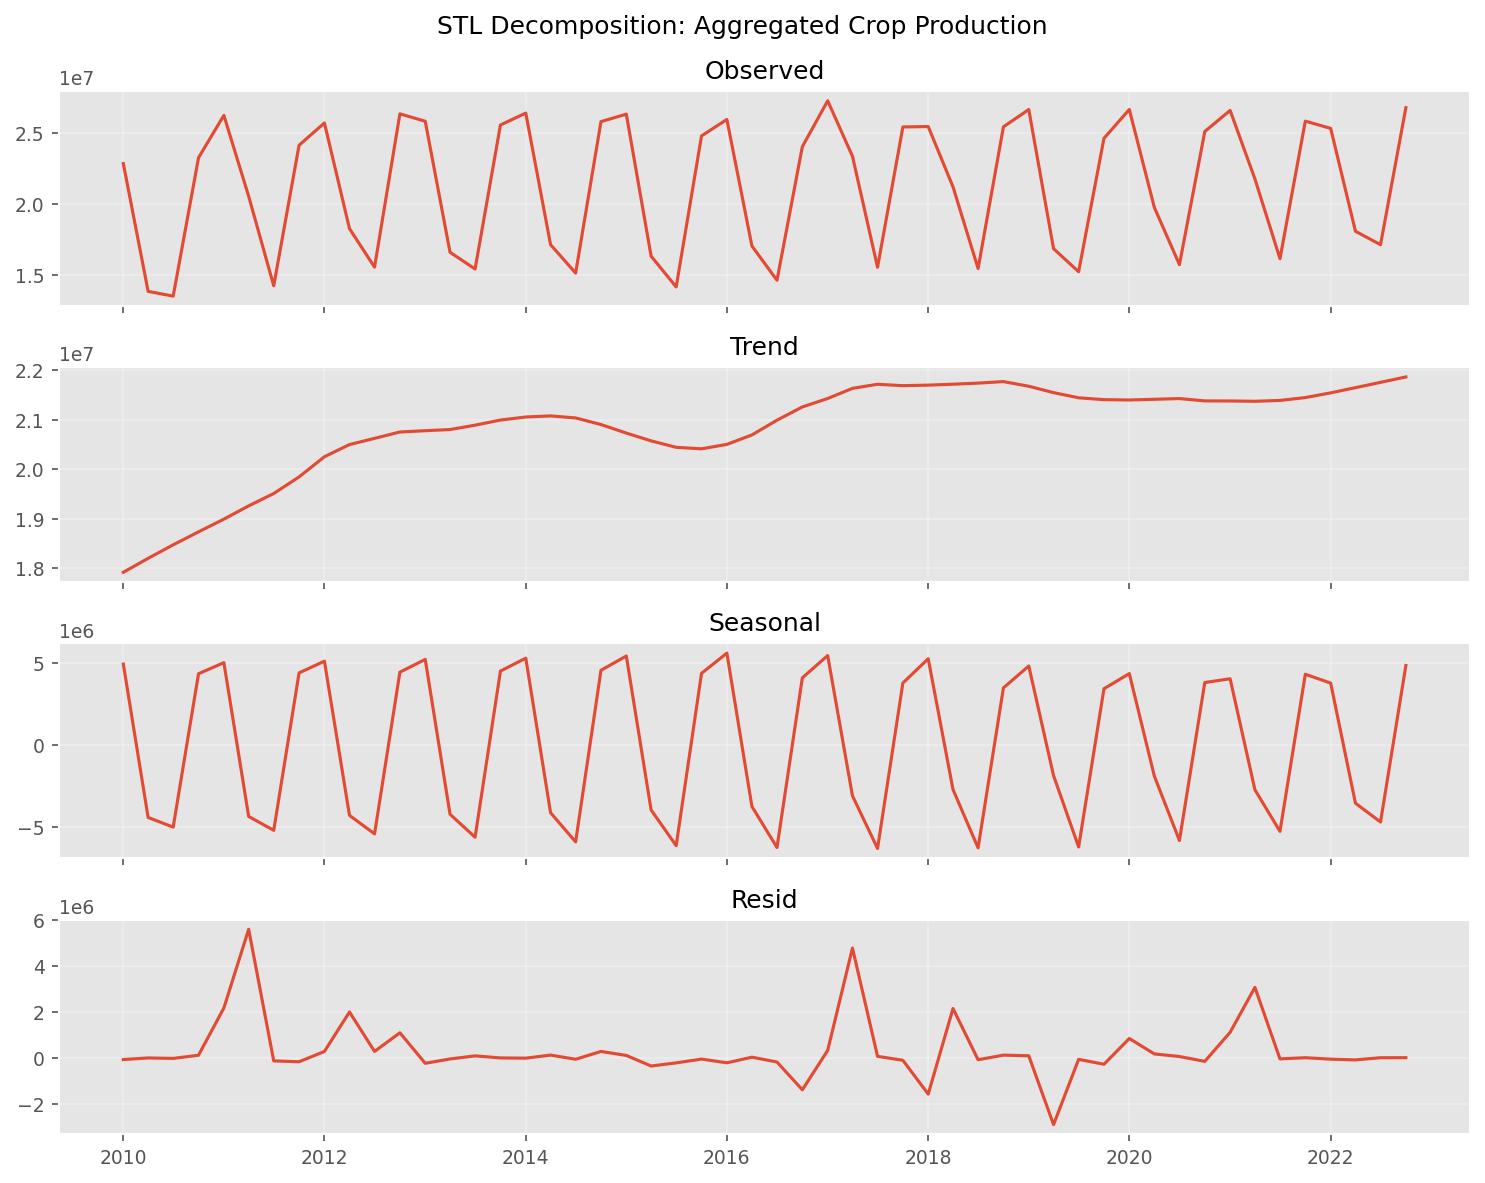

In [53]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, RandomWalkWithDrift, HistoricAverage
from statsmodels.tsa.seasonal import STL

def analyze_covid_impact(crops_data):
    """Analyze COVID-19 impact on aggregate crop production."""

    # Aggregate data and calculate YoY growth
    agg_data = (crops_data.groupby('ds')['y'].sum()
                .reset_index()
                .assign(unique_id='agg')
                .assign(yoy=lambda x: x['y'].pct_change(periods=4) * 100))

    # Create visualization
    fig, ax = plt.subplots(figsize=(10, 3))

    # Plot full time series
    agg_data.plot(x='ds', y='yoy', ax=ax, color='black',
                  label='Aggregated Crop Production (YoY %)')

    # Highlight COVID period
    covid_data = agg_data.query("ds >= '2020-01-01'")
    covid_data.plot(x='ds', y='yoy', ax=ax, color='blue',
                   label='COVID-19 Period', linewidth=3)

    # Add reference line
    ax.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    ax.set_ylabel('YoY Growth (%)')
    ax.set_title('COVID-19 Impact on Philippine Crop Production')
    ax.legend()
    plt.tight_layout()
    plt.show()

    # STL Decomposition
    stl_result = STL(agg_data['y'], period=4, robust=True).fit()

    fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
    components = ['observed', 'trend', 'seasonal', 'resid']
    data_arrays = [agg_data['y'], stl_result.trend, stl_result.seasonal, stl_result.resid]

    for ax, component, data in zip(axes, components, data_arrays):
        ax.plot(agg_data['ds'], data)
        ax.set_title(f'{component.title()}')
        ax.grid(True, alpha=0.3)

    plt.suptitle('STL Decomposition: Aggregated Crop Production')
    plt.tight_layout()
    plt.show()

    return agg_data

# Usage
agg_results = analyze_covid_impact(pipeline.crops_data)

#### Q2 - Answer:
* I take the aggregate volume of production across species and examined the yoy growth rate.
* The COVID-19 did not have an effect on crop production.
* In 2020Q1-2021Q3, the total crop production shows positive growth.
* STL decomposition also show a flat to increasing trend in aggregate production.

#### Q3.

- Create a basic pipeline for engineering time series features.

- Discuss the statistical features of the data. What are some points of interest? Are there any interesting clusters of crops?

- Extract sub-tables or create visualizations to support your analysis.

[Pipeline] ...... (step 1 of 4) Processing preprocessor, total=   0.0s
[Pipeline] . (step 2 of 4) Processing feature_extractor, total=   2.9s
[Pipeline] .. (step 3 of 4) Processing feature_selector, total=   0.0s


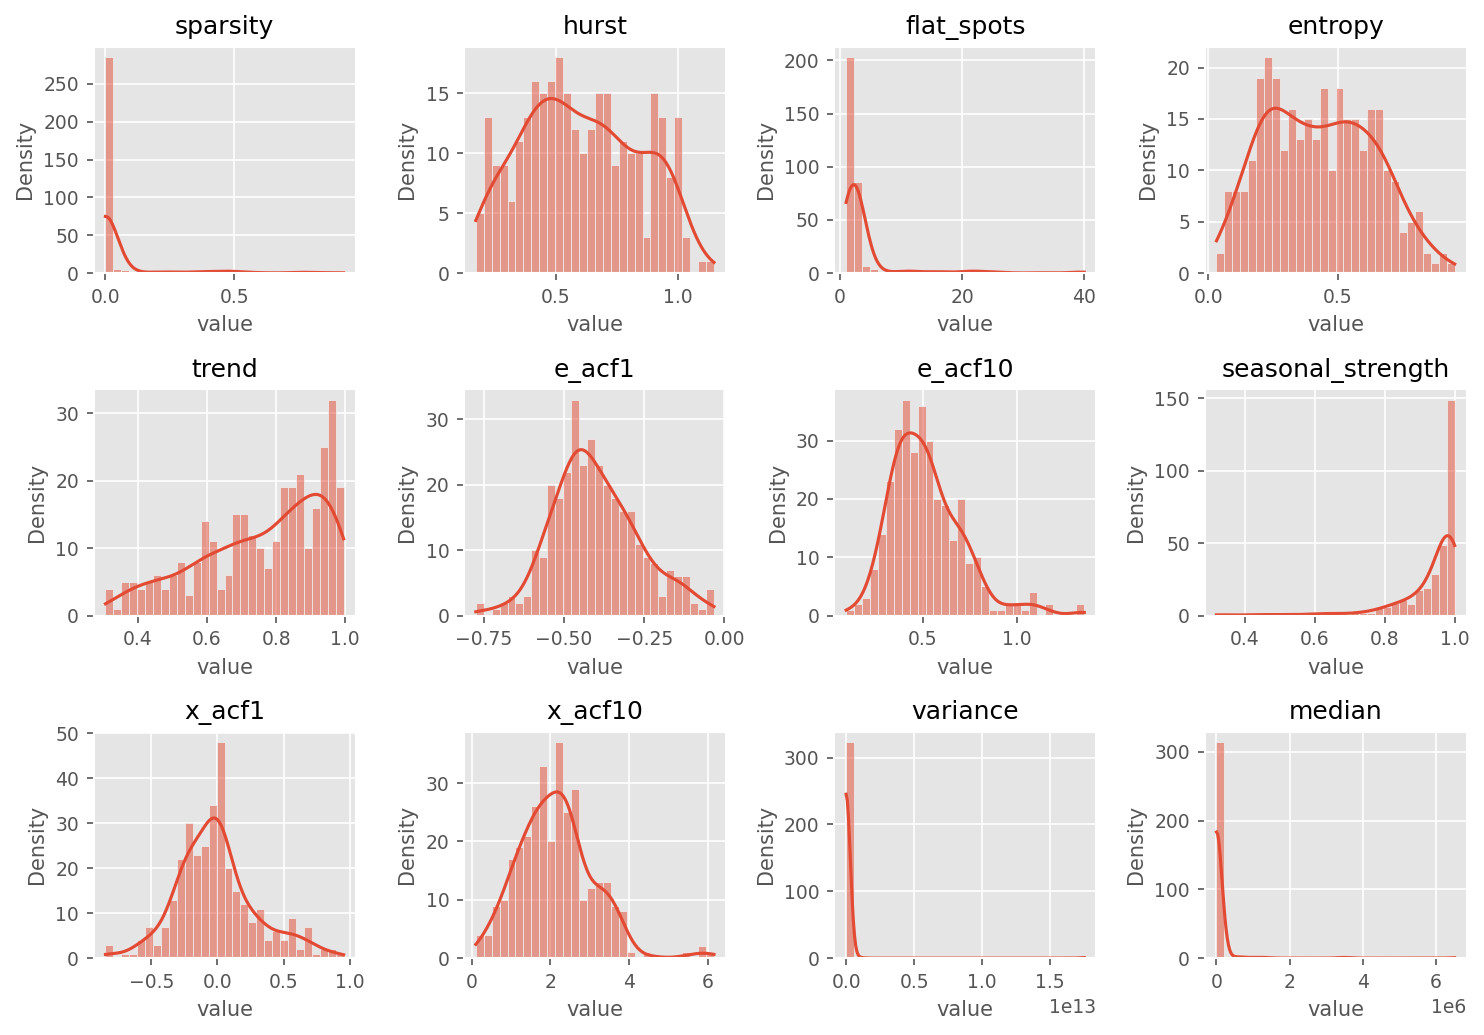

[Pipeline] ........ (step 4 of 4) Processing visualizer, total=   3.0s
Pipeline steps:
- preprocessor: TimeSeriesDataPreprocessor
- feature_extractor: TimeSeriesFeatureExtractor
- feature_selector: FeatureSelector
- visualizer: FeatureVisualizer


In [54]:
#I try to explore transformers and pipelines to reuse for our project
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from tsfeatures import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class TimeSeriesDataPreprocessor(BaseEstimator, TransformerMixin):
    """Convert wide format crop data to long format for tsfeatures."""

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """Transform wide format DataFrame to long format."""
        if isinstance(X, pd.DataFrame):
            long_data = (X.melt(ignore_index=False)
                        .reset_index()
                        .rename(columns={'index': 'ds',
                                       'variable': 'unique_id',
                                       'value': 'y'}))
            return long_data
        else:
            raise ValueError("Input must be a pandas DataFrame")

class TimeSeriesFeatureExtractor(BaseEstimator, TransformerMixin):
    """Extract comprehensive time series features."""

    def __init__(self, freq=4, features=None, scale=False):
        self.freq = freq
        self.scale = scale
        self.features = features or [
            statistics,
            acf_features,
            stl_features,
            crossing_points,
            entropy,
            flat_spots,
            lumpiness,
            stability,
            hurst,
            sparsity,
        ]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """Extract time series features."""
        features_df = tsfeatures(
            X,
            freq=self.freq,
            features=self.features,
            scale=self.scale
        )
        return features_df

class FeatureSelector(BaseEstimator, TransformerMixin):
    """Select specific features and reshape to long format."""

    def __init__(self, selected_features=None):
        self.selected_features = selected_features or [
            'trend', 'seasonal_strength',
            'e_acf1', 'e_acf10',
            'x_acf1', 'x_acf10',
            'flat_spots', 'sparsity',
            'entropy', 'hurst',
            'median', 'variance'
        ]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """Select features and convert to long format."""
        # Drop metadata columns
        features_clean = X.drop(columns=['nperiods', 'seasonal_period'], errors='ignore')

        # Convert to long format
        long_data = features_clean.melt(
            id_vars='unique_id',
            var_name='feature',
            value_name='value'
        )

        # Filter selected features
        if self.selected_features:
            long_data = long_data[long_data['feature'].isin(self.selected_features)]

        return long_data

class FeatureVisualizer(BaseEstimator, TransformerMixin):
    """Visualize feature distributions."""

    def __init__(self, figsize=(10, 7), n_cols=4):
        self.figsize = figsize
        self.n_cols = n_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        """Create feature distribution plots and return data unchanged."""
        features = X['feature'].unique()
        n_features = len(features)
        n_rows = (n_features - 1) // self.n_cols + 1

        fig, axes = plt.subplots(n_rows, self.n_cols, figsize=self.figsize)
        axes = axes.flatten() if n_rows > 1 else [axes] if self.n_cols == 1 else axes

        for i, feature in enumerate(features):
            if i < len(axes):
                feature_data = X[X['feature'] == feature]['value']
                sns.histplot(feature_data, kde=True, bins=30, ax=axes[i])
                axes[i].set_title(f"{feature}")
                axes[i].set_ylabel("Density")

        # Hide unused subplots
        for i in range(len(features), len(axes)):
            if i < len(axes):
                axes[i].set_visible(False)

        plt.tight_layout()
        plt.show()

        return X

# Create the pipeline
ts_feature_pipeline = Pipeline([
    ('preprocessor', TimeSeriesDataPreprocessor()),
    ('feature_extractor', TimeSeriesFeatureExtractor(freq=4)),
    ('feature_selector', FeatureSelector()),
    ('visualizer', FeatureVisualizer())
], verbose=True)

# Usage example:
# Fit and transform the data
long_features = ts_feature_pipeline.fit_transform(df)

# Access pipeline components
print("Pipeline steps:")
for name, step in ts_feature_pipeline.named_steps.items():
    print(f"- {name}: {type(step).__name__}")

# Access intermediate results
# preprocessed_data = ts_feature_pipeline.named_steps['preprocessor'].transform(df)
# features_only = ts_feature_pipeline.named_steps['feature_extractor'].transform(preprocessed_data)

# print(f"\nFeatures extracted: {features_only.shape}")
# print(f"Long format data: {long_features.shape}")



#### Q3 - Answer:

Below are some description of the ts-features used in the analysis.
* Entropy: Measures forecastability of the data where low value(high Signal-to-noise ratio)
* flat_spots: maximum run length (flat signal). May be used for anomaly detection
* hurst: long-term memory of time series
* lumpiness: variance of means
* stability: variance of variances
* sparsity: measures the proportion of zeros in the time series.

Based from the histogram/KDE plots, I can observed some plots have long tails, indicative presence of outliers in the dataset. These features are: sparsity, flatspots, variance, median.

The distribution of entropy is also wide (median = 0.5, sd ~ 0.25) indicating that a large portion of crops are hard to forecast.

#### Q4.

- Create a basic pipeline for finding outlier or anomalous time series.

- Visually inspect the plots for all crops or use a summary statistic to identify one or two series that exhibit anomalous behavior (e.g., extreme outliers, sudden structural breaks).

- Plot these outlier series and describe what makes them unusual.

Starting PCA-based Outlier Detection Pipeline
1. Preparing features for PCA analysis...
2. Standardizing features...
3. Performing PCA transformation...
4. Identifying top 5 outliers...

 PCA Analysis Results:
------------------------------
PCA Explained Variance:


,Component,Explained_Variance_Ratio,Cumulative_Variance_Ratio
0,PC1,0.4830,0.4830
1,PC2,0.2650,0.7480
2,PC3,0.1780,0.9259
3,PC4,0.0741,1.0000



Top 5 Outlier Crops (by PC1):


,unique_id,PC1,PC2
217,Pandan Fiber,9.6212,1.8976
145,Jute Mallow,7.8779,1.7794
24,Bagbagkong Fruit,6.3819,0.9050
92,Coriander,5.7273,-0.4784
70,Chai Sim,5.5261,0.5650



📈 Creating PCA scatter plot...


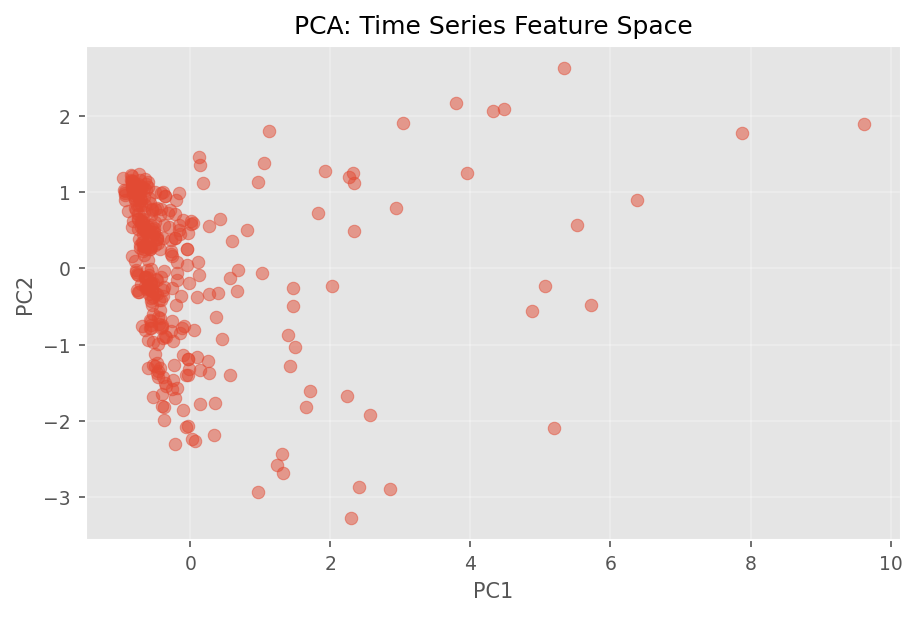


📈 Plotting outlier time series...


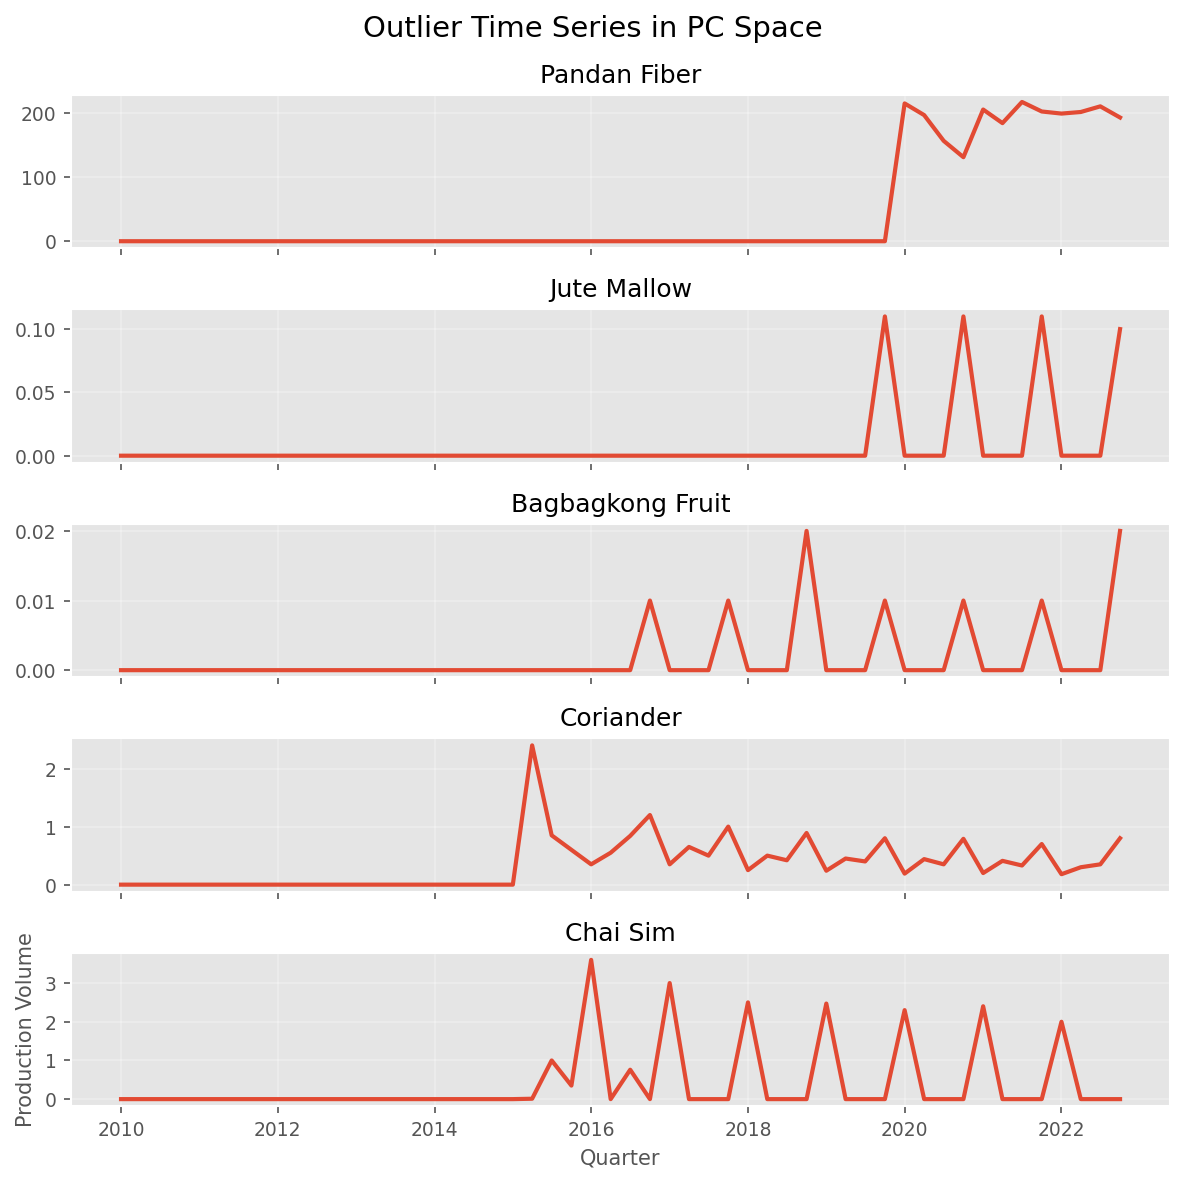


 Feature-based Outlier Analysis:
Top 10 crops by 'flat_spots' feature:


,seasonal_strength,trend,flat_spots,sparsity,unique_id
217,0.3191,0.9641,40,0.7692,Pandan Fiber
323,0.8610,0.9165,39,0.3269,Young Corn
145,0.8609,0.6316,39,0.9231,Jute Mallow
13,0.9461,0.8522,33,0.0000,Apat-apat
24,0.8439,0.5954,27,0.8654,Bagbagkong Fruit
65,0.7792,0.9758,24,0.4615,Cassava - Industrial Use
64,0.8186,0.9484,24,0.4615,Cassava - Food
2,0.6606,0.5333,24,0.3462,Abiu
70,0.8403,0.5937,22,0.7885,Chai Sim
40,0.9092,0.9396,21,0.5192,Basil



 Outlier Detection Complete!
• Identified 5 outlier crops
• Features used: seasonal_strength, trend, flat_spots, sparsity
• PC1 explains 48.3% of variance
• PC1 + PC2 explain 74.8% of variance

Outlier crops identified: ['Pandan Fiber', 'Jute Mallow', 'Bagbagkong Fruit', 'Coriander', 'Chai Sim']


In [56]:
def detect_outliers_with_pca(features_df, crops_df,
                            feature_columns=None,
                            n_outliers=5,
                            plot_size=(8, 8),
                            scatter_size=(6, 4)):
    """
    Complete PCA-based outlier detection pipeline for time series crops data.

    Parameters:
    -----------
    features_df : pd.DataFrame
        DataFrame containing time series features with 'unique_id' column
    crops_df : pd.DataFrame
        Long format DataFrame with columns: ds, unique_id, y
    feature_columns : list, optional
        List of feature columns to use for PCA analysis
    n_outliers : int
        Number of top outliers to identify and plot
    plot_size : tuple
        Figure size for time series plots (width, height)
    scatter_size : tuple
        Figure size for PCA scatter plot (width, height)

    Returns:
    --------
    dict
        Dictionary containing:
        - 'outlier_ids': List of outlier unique_ids
        - 'pca_results': DataFrame with PCA components
        - 'feature_analysis': DataFrame with feature-based outlier analysis
        - 'pca_summary': PCA explained variance summary
    """
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA

    # Default feature columns if not provided
    if feature_columns is None:
        feature_columns = ["seasonal_strength", "trend", "flat_spots", "sparsity"]

    print("Starting PCA-based Outlier Detection Pipeline")
    print("=" * 50)

    # Step 1: Prepare features for PCA
    print("1. Preparing features for PCA analysis...")
    feature_data = features_df[feature_columns].copy()
    unique_ids = features_df['unique_id'].copy()

    # Step 2: Standardize features
    print("2. Standardizing features...")
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(feature_data)

    # Step 3: Perform PCA
    print("3. Performing PCA transformation...")
    pca = PCA()
    pca_components = pca.fit_transform(features_scaled)

    # Create PCA results DataFrame
    pca_results = pd.DataFrame(
        pca_components,
        columns=[f'PC{i+1}' for i in range(pca_components.shape[1])]
    )
    pca_results['unique_id'] = unique_ids.values

    # Step 4: Identify outliers
    print(f"4. Identifying top {n_outliers} outliers...")
    top_outliers = pca_results.nlargest(n_outliers, "PC1")
    outlier_ids = top_outliers["unique_id"].tolist()

    # Step 5: Display results
    print("\n PCA Analysis Results:")
    print("-" * 30)

    # PCA explained variance
    pca_summary = pd.DataFrame({
        'Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
        'Explained_Variance_Ratio': pca.explained_variance_ratio_,
        'Cumulative_Variance_Ratio': np.cumsum(pca.explained_variance_ratio_)
    })

    print("PCA Explained Variance:")
    display(pca_summary.head())

    print(f"\nTop {n_outliers} Outlier Crops (by PC1):")
    display(top_outliers[['unique_id', 'PC1', 'PC2']])

    # Step 6: Create PCA scatter plot
    print("\n📈 Creating PCA scatter plot...")
    plt.figure(figsize=scatter_size)
    plt.scatter(pca_results['PC1'], pca_results['PC2'], alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA: Time Series Feature Space')
    plt.grid(True, alpha=0.3)
    plt.show()

    # Step 7: Plot outlier time series
    print("\n📈 Plotting outlier time series...")
    fig, axes = plt.subplots(n_outliers, 1, sharex=True, figsize=plot_size)

    if n_outliers == 1:
        axes = [axes]

    for i, unique_id in enumerate(outlier_ids):
        subset = crops_df[crops_df["unique_id"] == unique_id]

        axes[i].plot(subset["ds"], subset["y"], linewidth=2)
        axes[i].set_title(unique_id, fontsize=12)
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    plt.suptitle("Outlier Time Series in PC Space", fontsize=14)
    plt.xlabel("Quarter")
    plt.ylabel("Production Volume")
    plt.tight_layout()
    plt.show()

    # Step 8: Feature-based outlier analysis
    print("\n Feature-based Outlier Analysis:")
    analysis_columns = feature_columns + ['unique_id']
    feature_analysis = (features_df[analysis_columns]
                       .sort_values(by='flat_spots', ascending=False)
                       .head(10))

    print("Top 10 crops by 'flat_spots' feature:")
    display(feature_analysis)

    # Step 9: Summary
    print("\n Outlier Detection Complete!")
    print("=" * 50)
    print(f"• Identified {len(outlier_ids)} outlier crops")
    print(f"• Features used: {', '.join(feature_columns)}")
    print(f"• PC1 explains {pca.explained_variance_ratio_[0]:.1%} of variance")
    print(f"• PC1 + PC2 explain {sum(pca.explained_variance_ratio_[:2]):.1%} of variance")

    # Return comprehensive results
    return {
        'outlier_ids': outlier_ids,
        'pca_results': pca_results,
        'feature_analysis': feature_analysis,
        'pca_summary': pca_summary,
        'scaler': scaler,
        'pca_model': pca
    }

# Usage example:
preprocessed_data = ts_feature_pipeline.named_steps['preprocessor'].transform(df)
all_feat = ts_feature_pipeline.named_steps['feature_extractor'].transform(preprocessed_data)

results = detect_outliers_with_pca(
    features_df=all_feat,
    crops_df=preprocessed_data,
    n_outliers=5
)

# Access results
outlier_crops = results['outlier_ids']
pca_data = results['pca_results']
feature_outliers = results['feature_analysis']

print(f"\nOutlier crops identified: {outlier_crops}")

#### Q4 - Answer:
* For the anomaly detection, I selected the statistic that exhibited long tails in the distribution - a possible presence of anomaly.
* The notable features with long tails in the distribution were: seasonal strength, flat_spots, sparsity, median, and variance.
* From initial assessment of PCA projections, inclusion of median and variance flagged Sugarcane as anomaly - possibly since its one of the produced crops by volume. Thus, median and variance were omitted.
* The PCA projection shows outliers along PC1 component.
* The top crops with high PC1 (possible anomalies) are: Pandan Fiber, Jute Mallow, Bagbagkong Fruit, Coriander, Chai Sim.
* PC1 is represented by flat_spots and these anomalies show zero production with varying period - a structural break in the time series.


### E2. Forecasting Pipeline

In this section, you will select **one** crop and build several models to forecast its future production.

#### Q1.

- Choose one crop from the dataset to be the focus of your forecasting exercise.

- Briefly justify your choice. For example, you might choose a crop with strong seasonality, a clear trend, or one you identified as an anomaly.

Text(0.5, 0, 'Date')

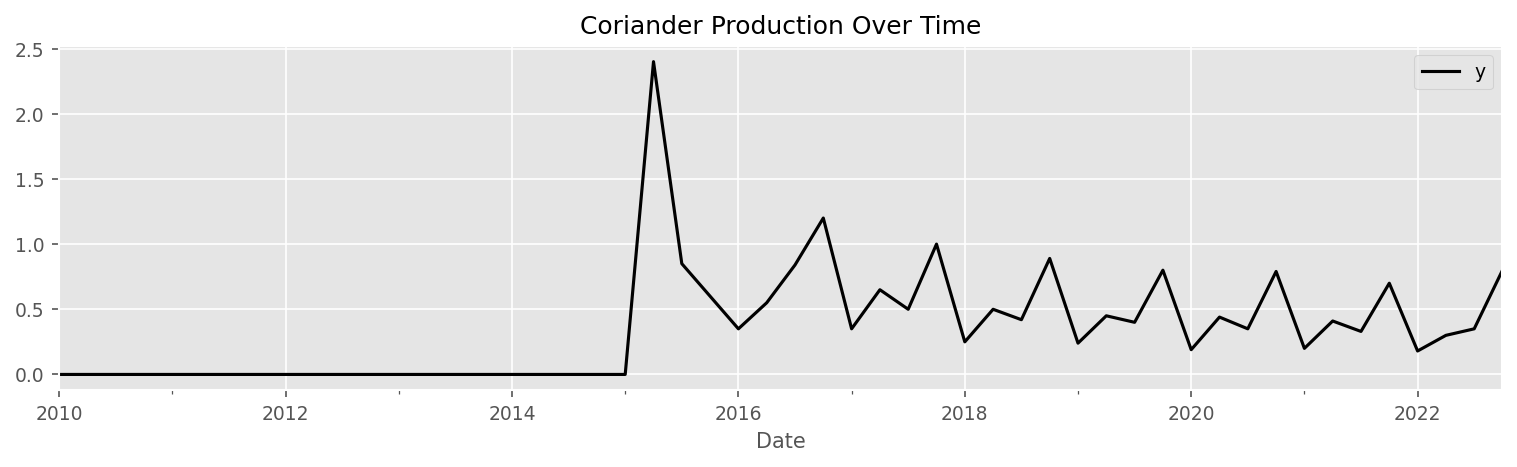

In [65]:
#one with strong seasonality
crops = preprocessed_data.copy()
select = 'Coriander'#'Coconut - Mature'
crop_i = crops[crops['unique_id'] == select].copy()
crop_i['y'] += 1E-16

fig, ax = plt.subplots(figsize=(10, 3))
crop_i.plot(x='ds', y='y', ax=ax, color='k')
ax.set_title(f'{select} Production Over Time')
ax.set_xlabel('Date')

#### Q1 - Answer:
The volume of production of Coriander is a good example of an anomaly series with a datashift, a large jump in volume of production in 2015. From 2015 onwards, there is a decreasing trend and regular seasonality of production of Coriander with peak at Q4. I find this interesting to investigate whether different time-series models can capture these datashifts.

#### Q2.

- Create a basic pipeline for generating forecasts.

- Generate 4-quarter-ahead forecasts for your chosen crop using models from each of the following categories:

  - **Baseline:** Naive, Seasonal Naive, and Mean methods.

  - **ETS:** An appropriate Exponential Smoothing model.

  - **ARIMA:** An appropriate ARIMA model.

  - **Time Series Regression:** Regression models using time-based features (e.g., trend, seasonal dummies). Include both a dynamic and non-dynamic regression model.

  - **Machine Learning:** Tree-based models like RandomForest and LightGBM.

In [122]:
# AI Disclaimer: Claude Sonnet 4 was used to help refactor the code
# Concise Forecasting Pipeline for All Model Categories
from statsforecast import StatsForecast
from statsforecast.models import *
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from utilsforecast.feature_engineering import trend, fourier, pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from functools import partial
import warnings
warnings.filterwarnings('ignore')

# Need to find a better way for capture datashifts dynamically

# Setup
select = 'Coriander'
crop_i = crops[crops['unique_id'] == select].copy()
crop_i['y'] += 1E-16
train = crop_i
#train = crop_i[crop_i['ds'] >= '2017-01-01'].copy()
HORIZON = 4
season_length = 4

print(f"Forecasting {select}: {train['ds'].min()} to {train['ds'].max()}")

# Prepare external features for regression models
features = [trend,
            partial(fourier, season_length=4, k=2)
            ]

df_train_aug, future_predictors = pipeline(train,
                                           features=features,
                                           freq="QS",
                                           h=HORIZON)

# Define all models in one place
def create_forecasting_pipeline():
    # StatsForecast models (Baseline + ETS + ARIMA)
    stats_models = [
        # Baseline
        Naive(), SeasonalNaive(season_length), RandomWalkWithDrift(), HistoricAverage(),
        # ETS
        AutoETS(season_length=season_length, model="AAA", alias="ETS_AAA"),
        AutoETS(season_length=season_length, model="MAM", alias="ETS_MAM"),
        # ARIMA
        AutoARIMA(season_length=season_length, alias="ARIMA"),
        # Dynamic Regression (ARIMA + external features)
        AutoARIMA(season_length=season_length, seasonal=False, alias="DynamicReg")
    ]

    # MLForecast models (Static Regression + ML)
    ml_models = [
        # Static Regression
        LinearRegression(), Ridge(),
        # Machine Learning
        RandomForestRegressor(n_estimators=50, random_state=42),
        lgb.LGBMRegressor(verbose=-1, n_estimators=50, random_state=42)
    ]

    return stats_models, ml_models

# Generate forecasts
def generate_all_forecasts():
    stats_models, ml_models = create_forecasting_pipeline()

    # StatsForecast models (regular)
    sf_regular = StatsForecast(stats_models[:-1], freq='QS', n_jobs=-1)
    fc_regular = sf_regular.forecast(h=HORIZON, df=train, fitted=True)

    # Dynamic regression model (needs external features)
    sf_dynamic = StatsForecast([stats_models[-1]], freq='QS')
    sf_dynamic.fit(df=df_train_aug)
    fc_dynamic = sf_dynamic.forecast(df=df_train_aug, h=HORIZON, X_df=future_predictors)

    # ML models
    mf = MLForecast(ml_models, freq="QS", lags=[4], target_transforms=[Differences([4])])
    mf.fit(df_train_aug, static_features = [])
    fc_ml = mf.predict(h=HORIZON, X_df=future_predictors)

    return fc_regular, fc_dynamic, fc_ml

# Execute pipeline
fc_regular, fc_dynamic, fc_ml = generate_all_forecasts()

# Combine all forecasts
all_forecasts = fc_regular.copy()
all_forecasts['DynamicReg'] = fc_dynamic['DynamicReg']
for col in fc_ml.columns:
    if col not in ['ds', 'unique_id']:
        all_forecasts[col] = fc_ml[col]

print(f"Generated forecasts for {len(all_forecasts.columns)-2} models")

# Display results
forecast_cols = [col for col in all_forecasts.columns if col not in ['ds', 'unique_id']]
result_df = all_forecasts[['ds'] + forecast_cols].set_index('ds')
print(f"\n=== FORECAST RESULTS ({len(forecast_cols)} models) ===")
display(result_df.round(2))

Forecasting Coriander: 2010-01-01 00:00:00 to 2022-10-01 00:00:00
Generated forecasts for 12 models

=== FORECAST RESULTS (12 models) ===


,Naive,SeasonalNaive,RWD,HistoricAverage,ETS_AAA,ETS_MAM,ARIMA,DynamicReg,LinearRegression,Ridge,RandomForestRegressor,LGBMRegressor
ds,,,,,,,,,,,,
2023-01-01,0.8,0.18,0.82,0.35,0.28,0.11,0.40,0.56,0.17,0.06,0.18,0.16
2023-04-01,0.8,0.30,0.83,0.35,0.59,0.11,0.43,1.02,0.41,0.23,0.36,0.30
2023-07-01,0.8,0.35,0.85,0.35,0.46,0.10,0.44,0.72,0.31,0.23,0.35,0.26
2023-10-01,0.8,0.80,0.86,0.35,0.67,0.10,0.54,1.20,0.93,0.71,0.87,0.77


#### Q2-Answer:
The table summarizes the forecast evaluation from different models.

#### Q3.

Create a single, clear plot that displays:

- The complete historical data for your chosen crop.

- The 4-quarter-ahead forecasts from the models you developed (for Q1 2023 to Q4 2023).

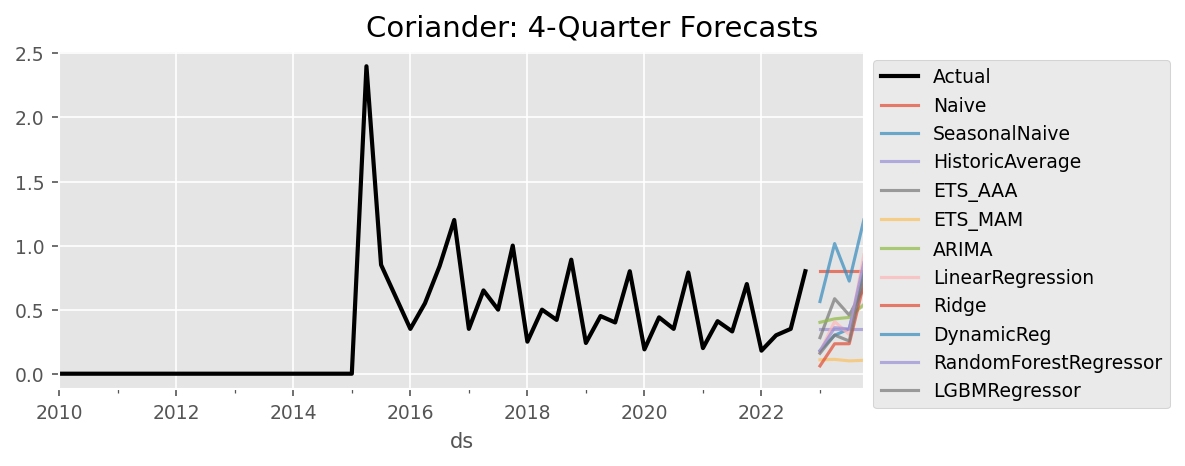

In [123]:
# Visualization
model_categories = {
    'Baseline': ['Naive', 'SeasonalNaive', 'RandomWalkWithDrift', 'HistoricAverage'],
    'ETS & ARIMA': ['ETS_AAA', 'ETS_MAM', 'ARIMA'],
    'Regression': ['LinearRegression', 'Ridge', 'DynamicReg'],
    'ML': ['RandomForestRegressor', 'LGBMRegressor']
}

fig, ax = plt.subplots(1, 1, figsize=(8, 3))

crop_i.plot(x='ds', y='y', ax=ax, color='black', linewidth=2, label='Actual')

for idx, (category, models) in enumerate(model_categories.items()):
    for model in models:
        if model in all_forecasts.columns:
            all_forecasts.plot(x='ds', y=model, ax=ax, alpha=0.7, label=model)

    #ax.set_title(f'{category} Models')
    #ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    #ax.grid(True, alpha=0.3)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.suptitle(f'{select}: 4-Quarter Forecasts', fontsize=14, y=1.02)
plt.show()

#### Q3-Answer:
Plot shows the 4 Quarter ahead forecast across different models.

#### Q4.

- Create a basic model evaluation pipeline using time series cross validation.

- Using TSCV, evaluate the 4-step forecast accuracy of the models you built in Part 2. Use the last 3 years of data as your rolling test set.

- Calculate the following error metrics: MAE, RMSE, MAPE, MASE, and RMSSE.

- Present the results in a DataFrame, ranking the models by MAE from best to worst.

In [124]:
# Generate forecasts
def generate_all_forecasts_TSCV(train = [] ,
                                df_train_aug = [],
                                step = 4, HORIZON=4*3):
    from functools import partial
    from utilsforecast.evaluation import evaluate
    from utilsforecast.losses import rmse, mae, mape as _mape, mase, rmsse

    def mape(df, models, id_col = "unique_id", target_col = "y"):
        df_mape = _mape(df, models, id_col=id_col, target_col=target_col)
        df_mape.loc[:, df_mape.select_dtypes(include='number').columns] *= 100

        return df_mape

    metrics = [rmse, mae, mape, partial(mase, seasonality=4), partial(rmsse, seasonality=4)]

    stats_models, ml_models = create_forecasting_pipeline()

    # StatsForecast models (regular)
    sf_regular = StatsForecast(stats_models[:-1], freq='QS', n_jobs=-1)
    #fc_regular = sf_regular.forecast(h=HORIZON, df=train, fitted=True)
    fc_regular_cv = sf_regular.cross_validation(df=train, h=HORIZON, step_size=step)
    fc_regular_eval = evaluate(fc_regular_cv.drop('cutoff', axis=1), metrics=metrics, train_df=train).drop('unique_id',axis=1).set_index('metric')

    # Dynamic regression model (needs external features)
    sf_dynamic = StatsForecast([stats_models[-1]], freq='QS')
    #sf_dynamic.fit(df=df_train_aug)
    #fc_dynamic = sf_dynamic.forecast(df=df_train_aug, h=HORIZON, X_df=future_predictors)
    fc_dynamic_cv = sf_dynamic.cross_validation(df=df_train_aug, h=HORIZON,  step_size=step)
    fc_dynamic_eval = evaluate(fc_dynamic_cv.drop('cutoff', axis=1), metrics=metrics, train_df=train).drop('unique_id',axis=1).set_index('metric')


    # ML models
    mf = MLForecast(ml_models, freq="QS", lags=[4], target_transforms=[Differences([4])])
    #mf.fit(df_train_aug, static_features = [])
    #fc_ml = mf.predict(h=HORIZON, X_df=future_predictors)
    #fc_ml = 0
    mf_cv = mf.cross_validation(
        df=df_train_aug,
        h=HORIZON,
        n_windows = 3,
        step_size=step,
        static_features = [])
    fc_ml_eval = evaluate(mf_cv.drop('cutoff', axis=1), metrics=metrics, train_df=train).drop('unique_id',axis=1).set_index('metric')

    output = (fc_regular_eval
             .join(fc_dynamic_eval, how='inner')
             .join(fc_ml_eval, how='inner')
             .T
             .sort_values(by='mae', ascending=True)
             .round(2))

    entry = {}
    entry['unique_id'] = train.unique_id.unique()[0]
    entry['Best Method'] = output.index.tolist()[0]
    entry.update(output.iloc[0,:].to_dict())

    return output, entry

results, entry = generate_all_forecasts_TSCV(train = train ,
                                df_train_aug = df_train_aug,
                                step = 4, HORIZON=4*3)
results

metric,rmse,mae,mape,mase,rmsse
SeasonalNaive,0.07,0.05,17.25,0.30,0.14
HistoricAverage,0.23,0.16,38.21,0.94,0.48
ARIMA,0.26,0.24,84.13,1.38,0.54
Ridge,0.35,0.25,61.40,1.40,0.73
LGBMRegressor,0.28,0.25,69.00,1.42,0.58
ETS_AAA,0.35,0.31,104.72,1.76,0.72
Naive,0.44,0.38,143.69,2.16,0.91
DynamicReg,0.48,0.40,111.01,2.25,1.01
RandomForestRegressor,0.79,0.50,101.99,2.85,1.65
RWD,0.55,0.51,182.23,2.92,1.16


#### Q4-Answer:

Seasonal naive is the best model for forecasting coriander production with MAE of 0.05 metric tons.

### E3. Forecasting at Scale

For this section, you will rigorously evaluate your models and then apply your pipeline to **all** crops in the dataset.

#### Q1.

- Apply your forecasting and evaluation pipelines from the previous sections to every crop in the dataset.

- For each crop, determine the single best-performing model according to MAE.

- Display your final results in a single DataFrame where:

  - The index is the crop name.

  - There is a column named Best Method that lists the name of the top-performing model.

  - The remaining columns show the corresponding MAE, RMSE, MAPE, MASE, and RMSSE for that best model.

In [ ]:
sample_output = pd.DataFrame(index=df.columns)
sample_output["Best Method"] = "ETS(A,A,A)"
sample_output[["MAE", "RMSE", "MAPE", "MASE", "RMSSE"]] = 0.
sample_output

,Best Method,MAE,RMSE,MAPE,MASE,RMSSE
unique_id,,,,,,
Abaca,"ETS(A,A,A)",0.0,0.0,0.0,0.0,0.0
Abaca Leafsheath,"ETS(A,A,A)",0.0,0.0,0.0,0.0,0.0
Abiu,"ETS(A,A,A)",0.0,0.0,0.0,0.0,0.0
Achuete,"ETS(A,A,A)",0.0,0.0,0.0,0.0,0.0
African Palm Leaves,"ETS(A,A,A)",0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
Yellow Bell,"ETS(A,A,A)",0.0,0.0,0.0,0.0,0.0
Yellow Corn,"ETS(A,A,A)",0.0,0.0,0.0,0.0,0.0
Yerba Buena,"ETS(A,A,A)",0.0,0.0,0.0,0.0,0.0


In [115]:
import tqdm
from joblib import Parallel, delayed


def prep_data_parallel(crops):
    features = [trend,
        partial(fourier, season_length=4, k=2)
        ]
    HORIZON = 4
    season_length = 4

    output = []
    for select in crops.unique_id.unique():
        crop_i = crops[crops['unique_id'] == select].copy()
        crop_i['y'] += 1E-16
        train = crop_i.copy()

        df_train_aug, future_predictors = pipeline(train,
                                                features=features,
                                                freq="QS",
                                                h=HORIZON)
        output.append((select, train, df_train_aug, future_predictors))
    return output

input_par = prep_data_parallel(crops)


start = time.time()
# Use joblib for parallel processing
RESULTS_all = Parallel(n_jobs=-1, verbose=1)(
    delayed(generate_all_forecasts_TSCV)(train, df_train_aug, 4, 4*3)
    for select, train, df_train_aug, future_predictors in tqdm.tqdm(input_par)
)

print(f'Forecasting at scale took {time.time() - start} seconds to run.')

100%|██████████| 325/325 [13:07<00:00,  2.42s/it]


Forecasting at scale took 795.1527442932129 seconds to run.


[Parallel(n_jobs=-1)]: Done 325 out of 325 | elapsed: 13.3min finished


In [117]:
#collect results
collect = []
for _, y in RESULTS_all:
    collect.append(y)

RESULTS_ALL = pd.DataFrame.from_records(collect).set_index('unique_id')
RESULTS_ALL

,Best Method,rmse,mae,mape,mase,rmsse
unique_id,,,,,,
Abaca,LGBMRegressor,1605.18,1197.79,7.4100e+00,1.43,1.32
Abaca Leafsheath,HistoricAverage,9.27,7.83,4.9710e+01,2.83,1.92
Abiu,LGBMRegressor,0.21,0.08,1.0305e+15,0.65,0.68
Achuete,RandomForestRegressor,33.90,15.37,2.5420e+01,1.87,1.28
African Palm Leaves,SeasonalNaive,15.66,9.56,4.0900e+00,0.90,1.07
...,...,...,...,...,...,...
Yellow Bell,SeasonalNaive,0.80,0.62,6.0100e+00,1.73,1.59
Yellow Corn,DynamicReg,229984.77,146585.00,1.0090e+01,0.94,1.09
Yerba Buena,SeasonalNaive,0.37,0.26,7.3500e+00,1.40,1.44


<Axes: xlabel='Best Method'>

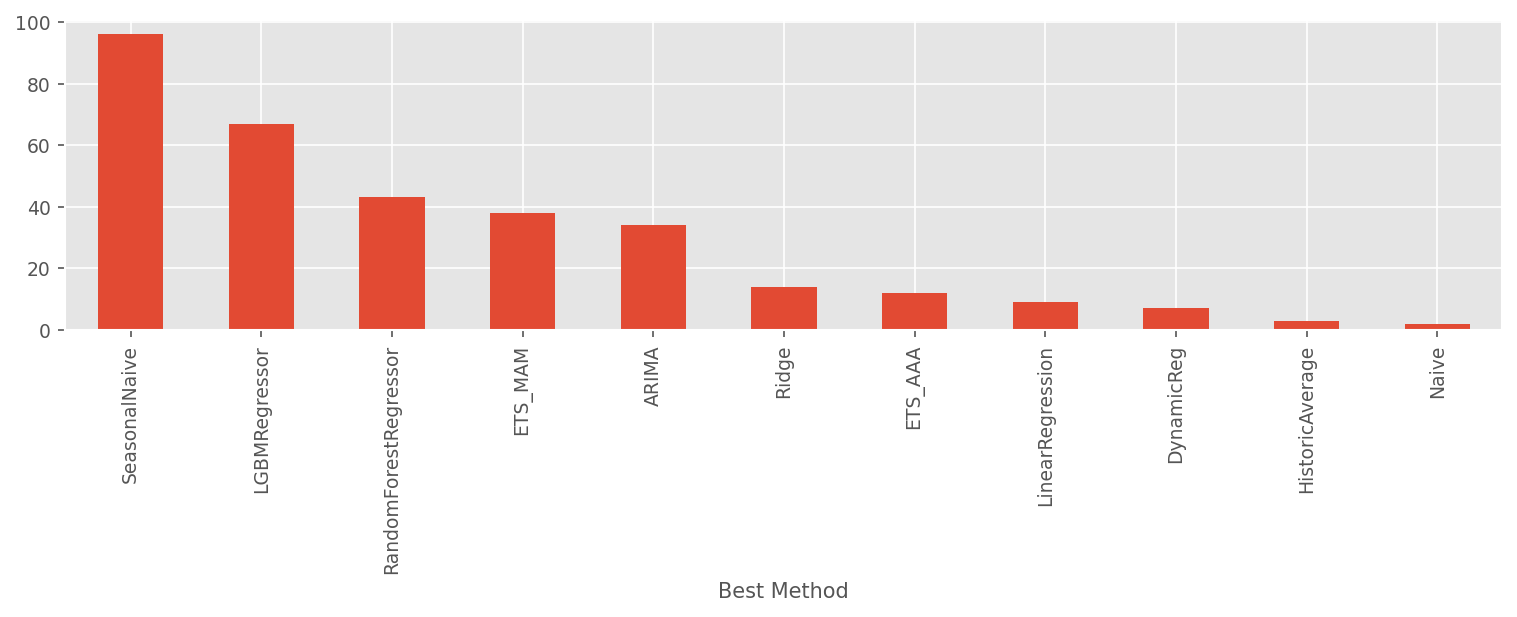

In [121]:
RESULTS_ALL['Best Method'].value_counts().plot(kind='bar')

#### Q1-Answer:

Based from the Forecast at scale exercise,
* Seasonal naive model tends to be sufficient to forecast 1/3 of the crops. This is expected as a large fraction of the crops exhibit strong seasonality.
* Next to Seasonal Naive are the Machine Learning models.

